# 网站搭建 环境win server 2003

**1.**IIS搭建

A. IIS中间件添加,添加删除windows组建中,添加如下组建,括号内组建点击详细信息选择

应用程序服务器-IIS-万维网服务-Active server Pages (ASP)和 万维网服务,点击下一步进行组件添加.

可以在所有程序-管理工具-IIS管理器打开IIS

**1.1** ASP网站搭建.

A. 先把默认网站禁用,然后确保WEB服务扩展中ASP已经点击允许 
    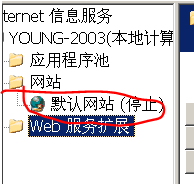
    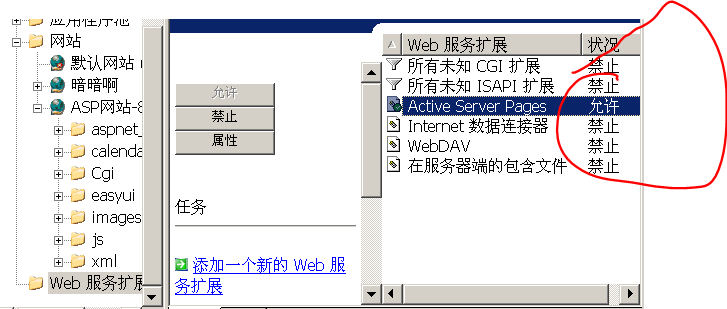

B. 右键网站,点击新建网站,填写自己的IP和端口,填写网站的路径,需要选中运行脚本,如需运行PHP C++脚本勾选执行(如ISAPI应用程序或CGI)

网站添加成功,匿名访问勾选`匿名访问代表无须验证账号密码,适合给所有人访问,这里可以从目录安全性-编辑看到程序自动给匿名访问用户创建了IUSR_YOUNG-2003的用户,这个命名规则是IUSER-计算机名称`

C.网站设置,右键新增加网站,点击属性,进行设置

`当然一个个网站设置很累,可以直接在网站右键设置共同的配置`

 - 网站-TCP端口, 实际环境中,IP是需要花钱的,所以对于不同网站或者同一网站内的不同页面可以映射不同的访问端口,

 - 主目录下的写入 是设置是否开放对该网页的写入权限.如果只是静态网页,无须开放

 - 主目录-配置-选项-启用父路径-需要勾选

 - 文档-启用默认内容文档,添加访问的文件后缀

    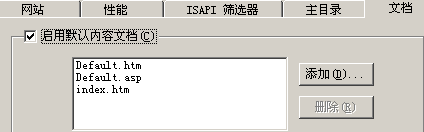


**1.2** ASPX网站搭建 测试文件名`iis-xxser.com--wwwroot`  测试 **用户名yuan 密码 123**

- ASP和APSX区别,ASP适合于访问量不大小网站,可以在客户端运行也可以在服务端运行,数据库用access.

    相比ASP,ASPX安全性较高,只能运行服务端,并且 要用专业的数据库进行数据读写存储.aspx是ASP.NET的文件后缀,所以搭建ASPX需要提前安装.NET的语言环境,2者相同点就是可以通过IIS中间件搭建.

- 先安装SQL2008R2,他也需要.NET的安装,会自动在安装前安装.net3.5以及一些安全补丁

    **生产环境**中SQL安装的时候功能不建议全部安装,在配置SQL的管理用户不建议使用管理员账号,

    测试环境忽略.

- 安装完SQL后需要添加ASPX网站的数据库文件.

    1. 运行Microsoft SQL server Management Studio
    2. WINDOW验证或者输入SQL的账号密码
    3. 数据库右键附加数据库,选中ASPX中的数据库文件 <font color="red">Q:附加数据库和还原的用法区别</font>

- ASPX网站虽然和APS同样在IIS搭建,但是需要去网站属性中的ASP.NET中选中相应的.NET版本才能运行.

    同时确保web服务扩展中ASP.NET的对应版本为允许运行状态.

- 这时候可以尝试访问登陆页面,进行用户认证.如果出现下面错误,则是数据库中需要添加一个NETWORD SERVICE的用户.解决方法如下:

    1. 数据库的安全性-登录名-新建登录名-搜索NETWORK SERVICE用户
    2. 设置NETWORK SERVICE用户,比如用户映射,服务器角色(权限) <font color="blue"> 测试环境可以忽略 </font>

    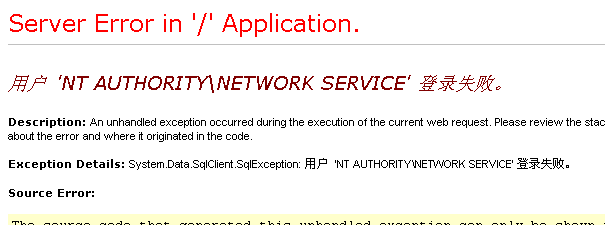

**2.**  Apache Tomcat Nginx中间件搭建

​	**2.1** 3种中间件区别

- Apache支持模块多，性能稳定，Apache本身是静态解析，适合静态HTML、图片等，但可以通过扩展脚本、模块等支持动态页面等。
    缺点：配置相对复杂，自身不支持动态页面。
    优点：相对于Tomcat服务器来说处理静态文件是它的优势，速度快。Apache是静态解析，适合静态HTML、图片等。
    (Apche可以支持PHPcgiperl,但是要使用Java的话，你需要Tomcat在Apache后台支撑，将Java请求由Apache转发给Tomcat处理。)

- Tomcat 是Apache 软件基金会（Apache Software Foundation）的Jakarta 项目中的一个核心项目。Tomcat 服务器是一个免费的开放源代码的Web 应用服务器，属于轻量级应用服务器。
    Tomcat是应用(Java)服务器，它只是一个Servlet(JSP也翻译成Servlet)容器，可以认为是Apache的扩展，但是可以独立于Apache运行。**默认使用8080端口**
    缺点：可以说Tomcat 只能用做java服务器
    优点：动态解析容器，处理动态请求，是编译JSP/Servlet的容器。

- Nginx是俄罗斯人编写的十分轻量级的HTTP服务器,Nginx，它的发音为“engine X”，是一个高性能的HTTP和反向代理服务器，同时也是一个IMAP/POP3/SMTP 代理服务器。其特点是占有内存少，并发能力强，易于开发，部署方便。Nginx 支持多语言通用服务器。
    缺点：Nginx 只适合静态和反向代理。
    优点：负载均衡、反向代理、处理静态文件优势。Nginx 处理静态请求的速度高于Apache。
    Nginx有动态分离机制，静态请求直接就可以通过Nginx处理，动态请求才转发请求到后台交由Tomcat进行处理。

    **2.2** 软件设置

    我们在对Apache中间件用PHPsttudy,对Tomcat使用Jspstudy.

    PHPsttudy 只支持PHP,Tomcat可以同时使用Apache支持PHP和Tomcat 解析JSP.

    2款设置基本差不多. Tomcat在Jspstudy设置中的高级系统设置可以把apache+php和tomcat+jsp分开解析.

    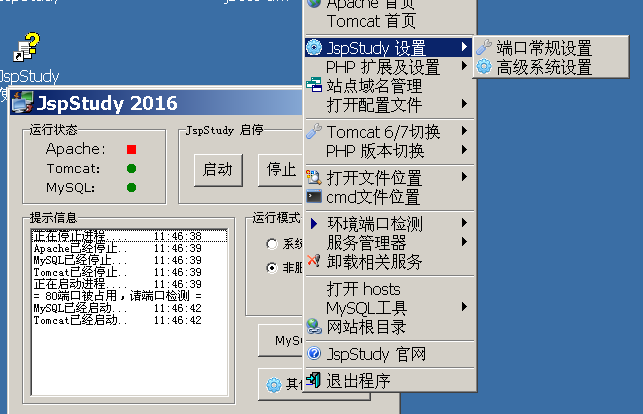
    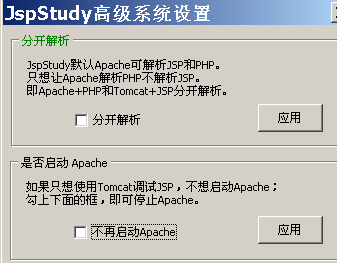

**2.3** PHP和JSP的网站搭建

把java编译的网站打包成.war,丢到jspstudy下的tomcat\webapps.程序会自动解析.

此时如果访问**C:\JspStudy\tomcat\webapps**\struts2-showcase\help.jsp的文件.

此时软件设置**C:\JspStudy\tomcat\webapps**为根目录,直接改成IP+端口, **注意斜杠反斜杠**

内网访问路径如下http://192.168.248.128:8080/struts2-showcase/help.jsp



phpstudy略有不同,把php文件放到下面的WWW文件夹,访问路径规则同上

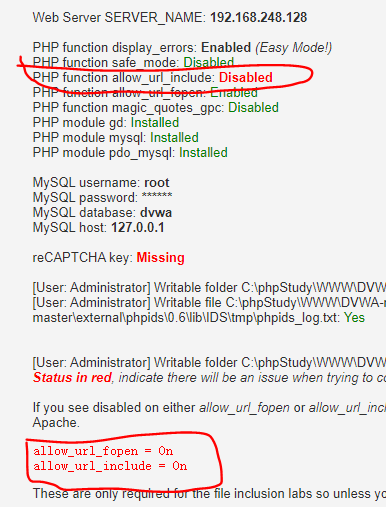

**↑**标红的信息注意下,phpstudy中在php扩展及设置中参数开关设置按提示打开

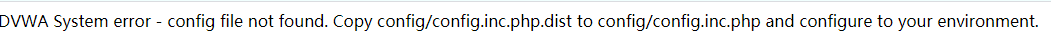
**↑**需要把网页的配置文件重命名为config.inc.php

allow_url_include和allow_url_fopen即可

**3. **jboss中间件搭建  默认账号密码为admin

​	3.1 准备安装包

	- JDK jdk-6u45-windows-i586.exe 和 JBOSS

​    3.2 安装JDK并配置环境变量

 - 假设JDK安装路径为C:\Program Files\Java\jdk1.6.0_45\
    新建系统变量，变量名为：JAVA_HOME   变量值：C:\Program Files\Java\jdk1.6.0_45\
    变量名：Path    变量值： %JAVA_HOME%\bin;%JAVA_HOME%\jre\bin
    变量名：CLASSPATH    变量值：.;%JAVA_HOME%\lib\dt.jar;%JAVA_HOME%\lib\tools.jar

 - 假设JBOSS安装路径为c:\jboss
    新建系统变量，变量名为：JBOSS_HOME   变量值：c:\jboss
    变量名为：SystemRoot   变量值：C:\Windows
    新建用户变量，变量名为：Path   变量值 %SystemRoot%/system32;%SystemRoot%;%JBOSS_HOME%\bin

    安装后试着shell中打印java和javac,看是否会有语法提示.如果没有,则配置不成功.

    需要为JBOSS添加用户，调用dos窗口，输入命令add-user **高版本适用** 低版本则直接运行c:\jboss\bin\run.bat

- 本机输入 http://localhost:8080/  或者http://127.0.0.1:8080/ 出现如下页面表示成功运行

    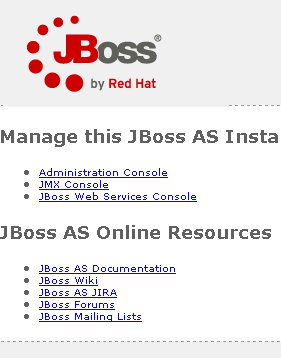
- 如果要外网访问还需要修改jboss下的修改 c:\jboss\server\default\deploy\jbossweb.sar\server.xml 的配置文件,搜索 “8080″和${jboss.bind.address}改为80及ip为：0.0.0.0   或直接运行run.bat -b 0.0.0.0..用默认的admin账号密码登陆,点击web application(war),上传war包文件,进行自动解析运行即可.



**4. **weblogic 中间件搭建  默认端口7001
- 4.1 解压 weblogic.jar disk里找到install.exe 进行安装

    可能会跳出来java版本不匹配的情况.如果版本不匹配但是可以运行可以忽略
- 4.2 设置密码一定要复杂,单纯数字不让过,管理服务器可以点,点了以后改端口,默认是7001.
    在最后一步记录下管理服务器url http://young-2003:7001/console 命名规则为 http://计算机名:7001/console
    安装目录下 `Oracle\Middleware\Oracle_Home\user_projects\domains\base_domain\bin\`里的 startWebLogic.cmd 和stopWebLogic.cmd
分别是开启和停止服务的程序  
    ## weblogic 登陆页面: http://IP:7001/console/login/LoginForm.jsp
- 4.3 配置网站
    base_domain-部署-安装,要么选择上传文件,要么直接在服务器路径里直接安装,根据文件大小决定安装方式.<p>
    安装的时候注意选择部署的名字,决定了网页的访问路径,比如这个例子中安装包名字为struts2-showcase.war,部署的名字为struts2-showcase
    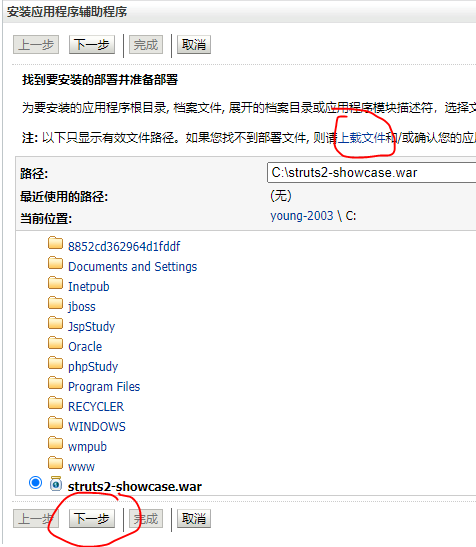
- 4.4 访问
    访问路径为 http://192.168.16.152:7001/struts2-showcase/index.jsp<p>
    访问路径规则如下
    根目录(http://192.168.16.152:7001)根目录/(struts2-showcase)部署名字/index.jsp

# win7环境下搭建IIS和PHPSTUDY
先安装IIS,控制面板-程序里安装Internet信息服务.
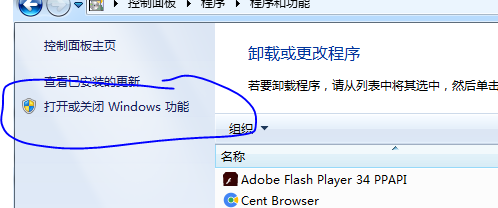
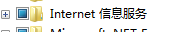
安装phpstudy,win7运行需要插件v9X86和V11的64后切换到php+IIS模式运行.
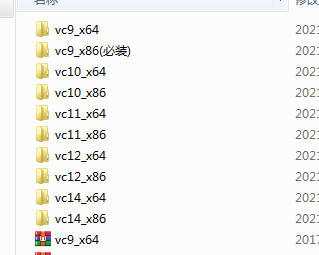
PHPSTUDY会自动出现在这里.然后把测试网站放到Php的根目录下
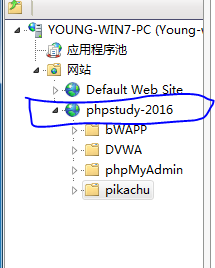
相应的网站根目录包选中后,选择处理程序映射
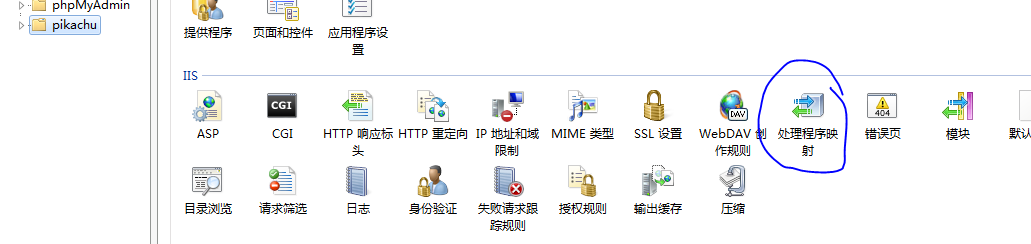
选中PHPSTUDY_FASTCGI,点击编辑,设置请求限制
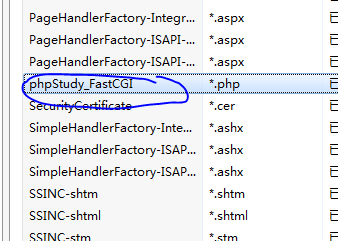
取消勾选后,网站可以正常访问了.
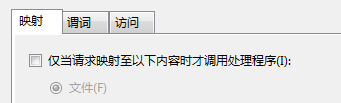